In [38]:
import pandas as pd

csv_file = 'data\document_type_data.csv'
df = pd.read_csv(csv_file, index_col=[0])
df

,ocr,text,label,file_name
0,"{'pageImages': [{'__typename': 'Image', 'width...","['Chaikin, ', 'Karen ', 'n ', ""O' "", 'o ', 'Fr...",email,2085136614c.pdf
1,"{'pageImages': [{'__typename': 'Image', 'width...","['> ', 'Jenny, ', 'After ', 'speaking ', 'with...",email,2085136814a.pdf
2,"{'pageImages': [{'__typename': 'Image', 'width...","['Please ', 'call ', 'with ', 'any ', 'questio...",email,2085140145a.pdf
3,"{'pageImages': [{'__typename': 'Image', 'width...","['2085158326 ', 'Williams, ', 'Carrie ', 'T. '...",email,2085158326.pdf
4,"{'pageImages': [{'__typename': 'Image', 'width...","['GJ ', '□3 ', 'A ', 'nice ', 'ending ', 'to '...",email,2085161311b.pdf
...,...,...,...,...
95,"{'pageImages': [{'__typename': 'Image', 'width...","['CURRICULUM ', 'VITAE ', 'NILANJAN ', 'ROY ',...",resumee,50701639-1640.pdf
96,"{'pageImages': [{'__typename': 'Image', 'width...","['BIOGRAPHICAL ', 'SKETCH ', 'Mark ', 'S. ', '...",resumee,50712092-2093.pdf
97,"{'pageImages': [{'__typename': 'Image', 'width...","['May. ', '1997 ', 'CURRICULUM ', 'VITAE ', 'E...",resumee,50735851-5852.pdf
98,"{'pageImages': [{'__typename': 'Image', 'width...","['I ', 'CURRICULUM ', 'VITAE ', '* ', 'NAbE: '...",resumee,80412888_80412908.pdf


Using eval() is not really save but it's a quick way to get the text in this case.

In [39]:
df.text = df.text.map(lambda x: " ".join(eval(x)))
df.text

0     Chaikin,  Karen  n  O'  o  From:  Sent:  To:  ...
1     >  Jenny,  After  speaking  with  Elisa  about...
2     Please  call  with  any  questions.  Thanks.  ...
3     2085158326  Williams,  Carrie  T.  LBCo.  will...
4     GJ  □3  A  nice  ending  to  the  story  below...
                            ...                        
95    CURRICULUM  VITAE  NILANJAN  ROY  NAME  1st  O...
96    BIOGRAPHICAL  SKETCH  Mark  S.  Ptashne  Profe...
97    May.  1997  CURRICULUM  VITAE  Education  and ...
98    I  CURRICULUM  VITAE  *  NAbE:  Emil  R.  Unan...
99    VITA  e-mail  Professor,  School  of  Social  ...
Name: text, Length: 100, dtype: object

In [40]:
df.label.value_counts(dropna=False)

resumee    25
letter     25
email      25
invoice    25
Name: label, dtype: int64

# Text length

First I like to see how my text length is distributed and whether there are any big outliers I should take care of.

0 texts are under 30 characters.


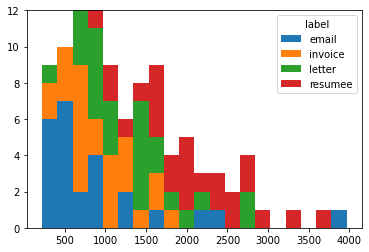

,desc_len
label,
email,905.96
invoice,937.96
letter,1332.20
resumee,2055.76


In [42]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

# get length of descriptions
df["desc_len"] = df.text.map(lambda x: len(x))
count_texts = df.where(df.desc_len<=50).dropna(how="all").shape[0]

# 
min_len = 30
print(f"{count_texts} texts are under {min_len} characters.")


_, edges = np.histogram(df["desc_len"], bins=20)
histdata = []; labels=[]
for n, group in df.groupby("label"):
    histdata.append(np.histogram(group["desc_len"], bins=edges)[0])
    labels.append(n)

hist = np.array(histdata) 
histcum = np.cumsum(hist,axis=0)

plt.bar(edges[:-1],hist[0,:], width=np.diff(edges)[0],
            label=labels[0], align="edge")

for i in range(1,len(hist)):
    plt.bar(edges[:-1],hist[i,:], width=np.diff(edges)[0],
            bottom=histcum[i-1,:],label=labels[i], align="edge")

plt.legend(title="label")
plt.show()

df.groupby(df.label).mean().sort_values(by='desc_len')

# Pre-Processing

Removing stop words, punctuation, named entities, setting everything to lower case and lemmatization can all help when analyzing (key)word frequencies further down.

In [46]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load('en_core_web_sm')

def spacy_tokenizer(text):
    tokens = nlp(text)
    # Lemmatizing each token, converting each token into lowercase and removing puncutation and named entities
    tokens = [ word.lemma_.lower().strip() for word in tokens if not word.is_punct and not word.ent_type_ ]
    # Removing stop words
    tokens = [ word for word in tokens if word not in STOP_WORDS ]

    return " ".join(tokens)
    
df["text_pre_processed"] = df.text.map(spacy_tokenizer)
df

,ocr,text,label,file_name,desc_len,text_pre_processed
0,"{'pageImages': [{'__typename': 'Image', 'width...","Chaikin, Karen n O' o From: Sent: To: ...",email,2085136614c.pdf,377,chaikin karen n o o sent subject chai...
1,"{'pageImages': [{'__typename': 'Image', 'width...","> Jenny, After speaking with Elisa about...",email,2085136814a.pdf,909,> jenny speak elisa circle k. ask ...
2,"{'pageImages': [{'__typename': 'Image', 'width...",Please call with any questions. Thanks. ...,email,2085140145a.pdf,1301,question thank nwpoil u 1 rmrtnro ...
3,"{'pageImages': [{'__typename': 'Image', 'width...","2085158326 Williams, Carrie T. LBCo. will...",email,2085158326.pdf,463,2085158326 williams carrie t. lbco pull...
4,"{'pageImages': [{'__typename': 'Image', 'width...",GJ □3 A nice ending to the story below...,email,2085161311b.pdf,396,gj □ 3 nice end story pierce sent ...
...,...,...,...,...,...,...
95,"{'pageImages': [{'__typename': 'Image', 'width...",CURRICULUM VITAE NILANJAN ROY NAME 1st O...,resumee,50701639-1640.pdf,1007,curriculum vitae nilanjan roy 1st oct 1...
96,"{'pageImages': [{'__typename': 'Image', 'width...",BIOGRAPHICAL SKETCH Mark S. Ptashne Profe...,resumee,50712092-2093.pdf,1947,1968 1973- 1974 1975 1975 1977 1979 19...
97,"{'pageImages': [{'__typename': 'Image', 'width...",May. 1997 CURRICULUM VITAE Education and ...,resumee,50735851-5852.pdf,2036,curriculum vitae education research expe...
98,"{'pageImages': [{'__typename': 'Image', 'width...",I CURRICULUM VITAE * NAbE: Emil R. Unan...,resumee,80412888_80412908.pdf,1677,curriculum vitae nabe emil r. unanue d...


# Top n Predictive Words (TF-IDF)
These words are the most common in documents for a certain class, relative to how often they occured in all classes. This might or might not be interesting to gain some insight on the text data in our documents.

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_top_n_predictive(column_name, n_words=20):
    tf_idf = TfidfVectorizer(ngram_range=(1, 1))
    tf_idf = tf_idf.fit(df[column_name])

    tfidf_column = f"tfidf_{column_name}"
    df[tfidf_column] = df[column_name].map(lambda text: tf_idf.transform([text])) 
    df[tfidf_column] = df[tfidf_column].map(lambda x: x.toarray())

    df_average_tfidfs = df.groupby(df.label)[tfidf_column].apply(np.mean)

    word_list = np.array(tf_idf.get_feature_names())

    for i in range(df_average_tfidfs.shape[0]):
        vec = df_average_tfidfs[i]
        tfidf_sorting = np.argsort(vec).flatten()[::-1]

        top_n = word_list[tfidf_sorting][:n_words]
        print(f"{df_average_tfidfs.index[i]}: {top_n}\n")

get_top_n_predictive("text_pre_processed", n_words=20)


email: ['subject' 'sent' 'message' 'pm' 'thank' 'original' '2001' 'oo' 'john'
 'com' 'know' 'hoel' 'need' 'meeting' 'joanne' 'let' 'end' 'cc' 'mark'
 'marlene']

invoice: ['invoice' '00' 'inc' 'date' 'total' '30' 'expense' 'box' '12' 'york' 'mr'
 '000' 'description' 'tobacco' 'lorillard' '50' 'fax' 'co' 'new' 'net']

letter: ['cigarette' 'copy' 'tobacco' 'sincerely' 'mr' 'dr' 'letter' 'vice'
 'president' 'street' 'philip' 'morris' 'report' 'new' 'thank' 'york'
 'enclose' 'company' 'marlboro' 'display']

resumee: ['university' 'research' 'biology' 'department' 'fellow' 'cell'
 'molecular' 'laboratory' 'assistant' 'professor' 'medical' 'postdoctoral'
 'pathology' 'college' 'cancer' 'education' 'biochemistry' 'present'
 'award' 'birth']



## Frequency of words in text

Finally let's look at what share of documents from a specific class contain certain keywords.

In [51]:
from collections import defaultdict

keywords = ["subject", "sent", "message", "invoice", "total", "sincerely", "letter", "university", "research"]
keyword_counts = defaultdict(lambda: defaultdict(float))

def count_words_in_text(text, label):
    total_texts_for_label = df.label.value_counts()[label]
    for keyword in keywords:
        if keyword in text:
            keyword_counts[label][keyword]+= 1 / total_texts_for_label

df.apply(lambda x: count_words_in_text(x.text_pre_processed, x.label), axis=1)
print(pd.DataFrame(keyword_counts))

            email  invoice  letter  resumee
subject      0.92     0.04    0.12     0.04
sent         0.76     0.04    0.16     0.48
message      0.56      NaN     NaN      NaN
letter       0.08      NaN    0.28     0.04
research     0.04     0.24    0.20     0.92
invoice       NaN     0.84     NaN      NaN
total         NaN     0.48     NaN     0.16
university    NaN     0.04    0.08     0.96
sincerely     NaN      NaN    0.56      NaN
